In [1]:
import pandas as pd

# Load the data files
transaction_data_path = 'QVI_transaction_data.xlsx'
purchase_behaviour_path = 'QVI_purchase_behaviour.csv'

# Reading the Excel and CSV files
transaction_data = pd.read_excel(transaction_data_path)
purchase_behaviour = pd.read_csv(purchase_behaviour_path)

# Displaying the first few rows of each dataset
transaction_data_head = transaction_data.head()
purchase_behaviour_head = purchase_behaviour.head()

transaction_data_head, purchase_behaviour_head

(    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
 0  43390          1            1000       1         5   
 1  43599          1            1307     348        66   
 2  43605          1            1343     383        61   
 3  43329          2            2373     974        69   
 4  43330          2            2426    1038       108   
 
                                   PROD_NAME  PROD_QTY  TOT_SALES  
 0    Natural Chip        Compny SeaSalt175g         2        6.0  
 1                  CCs Nacho Cheese    175g         3        6.3  
 2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
 3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
 4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  ,
    LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
 0            1000   YOUNG SINGLES/COUPLES          Premium
 1            1002   YOUNG SINGLES/COUPLES       Mainstream
 2            1003          YOUNG FAMILIES           Budget
 

In [2]:
# High-level summary of transaction data
transaction_data_summary = transaction_data.describe(include='all')
transaction_data_info = transaction_data.info()

# High-level summary of purchase behaviour data
purchase_behaviour_summary = purchase_behaviour.describe(include='all')
purchase_behaviour_info = purchase_behaviour.info()

# Check for missing values
transaction_data_missing = transaction_data.isnull().sum()
purchase_behaviour_missing = purchase_behaviour.isnull().sum()

transaction_data_summary, transaction_data_info, transaction_data_missing, purchase_behaviour_summary, purchase_behaviour_info, purchase_behaviour_missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
m

(                 DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
 count   264836.000000  264836.00000    2.648360e+05  2.648360e+05   
 unique            NaN           NaN             NaN           NaN   
 top               NaN           NaN             NaN           NaN   
 freq              NaN           NaN             NaN           NaN   
 mean     43464.036260     135.08011    1.355495e+05  1.351583e+05   
 std        105.389282      76.78418    8.057998e+04  7.813303e+04   
 min      43282.000000       1.00000    1.000000e+03  1.000000e+00   
 25%      43373.000000      70.00000    7.002100e+04  6.760150e+04   
 50%      43464.000000     130.00000    1.303575e+05  1.351375e+05   
 75%      43555.000000     203.00000    2.030942e+05  2.027012e+05   
 max      43646.000000     272.00000    2.373711e+06  2.415841e+06   
 
              PROD_NBR                               PROD_NAME       PROD_QTY  \
 count   264836.000000                                  264836  264836.000000

In [12]:
# Load and clean the data
transaction_data = pd.read_excel(transaction_data_path)
purchase_behaviour = pd.read_csv(purchase_behaviour_path)

# Convert DATE to datetime format
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')

# Detect and handle outliers in PROD_QTY and TOT_SALES
transaction_data_cleaned = transaction_data[(transaction_data['PROD_QTY'] <= 10) & (transaction_data['TOT_SALES'] <= 50)]

# Correct the extraction and conversion of PACK_SIZE
transaction_data_cleaned['PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract(r'(\d+)').astype(float)
transaction_data_cleaned['BRAND_NAME'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]

# Summarize the cleaned data again
cleaned_data_summary_corrected = transaction_data_cleaned.describe(include='all', datetime_is_numeric=True)

# Calculate Average Spending per Transaction
avg_spending_per_transaction = transaction_data_cleaned.groupby('LYLTY_CARD_NBR')['TOT_SALES'].mean().reset_index()
avg_spending_per_transaction.rename(columns={'TOT_SALES': 'AVG_SPENDING'}, inplace=True)

# Calculate Frequency of Purchases
purchase_frequency = transaction_data_cleaned.groupby('LYLTY_CARD_NBR').size().reset_index(name='PURCHASE_FREQUENCY')

# Calculate Popularity of Brands
brand_popularity = transaction_data_cleaned['BRAND_NAME'].value_counts().reset_index()
brand_popularity.columns = ['BRAND_NAME', 'PURCHASE_COUNT']

# Calculate Pack Size Preferences
pack_size_preferences = transaction_data_cleaned['PACK_SIZE'].value_counts().reset_index()
pack_size_preferences.columns = ['PACK_SIZE', 'PURCHASE_COUNT']

# Merging the purchase behaviour data with calculated metrics
customer_metrics = avg_spending_per_transaction.merge(purchase_frequency, on='LYLTY_CARD_NBR')
customer_metrics = customer_metrics.merge(purchase_behaviour, on='LYLTY_CARD_NBR')

# Display summaries and results
(cleaned_data_summary_corrected.head(), 
 avg_spending_per_transaction.head(), 
 purchase_frequency.head(), 
 brand_popularity.head(), 
 pack_size_preferences.head(), 
 customer_metrics.head())

C:\Users\reuel\AppData\Local\Temp\ipykernel_7392\1907843415.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_cleaned['PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract(r'(\d+)').astype(float)
C:\Users\reuel\AppData\Local\Temp\ipykernel_7392\1907843415.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_cleaned['BRAND_NAME'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]


(                                 DATE      STORE_NBR  LYLTY_CARD_NBR  \
 count                          264834  264834.000000   264834.000000   
 unique                            NaN            NaN             NaN   
 top                               NaN            NaN             NaN   
 freq                              NaN            NaN             NaN   
 mean    2018-12-30 00:52:10.292938240     135.079423   135548.793331   
 
                TXN_ID       PROD_NBR                               PROD_NAME  \
 count   264834.000000  264834.000000                                  264834   
 unique            NaN            NaN                                     114   
 top               NaN            NaN  Kettle Mozzarella   Basil & Pesto 175g   
 freq              NaN            NaN                                    3304   
 mean    135157.623236      56.583554                                     NaN   
 
              PROD_QTY      TOT_SALES      PACK_SIZE BRAND_NAME  
 count

In [14]:
import pandas as pd

# Load the new data file
data_path = 'QVI_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the data
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [15]:
# Convert DATE to datetime format
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract month and year from DATE
data['MONTH'] = data['DATE'].dt.to_period('M')

# Calculate monthly metrics: total sales, number of customers, average transactions per customer
monthly_metrics = data.groupby(['STORE_NBR', 'MONTH']).agg(
    total_sales=('TOT_SALES', 'sum'),
    total_customers=('LYLTY_CARD_NBR', 'nunique'),
    total_transactions=('TXN_ID', 'nunique')
).reset_index()

# Calculate average transactions per customer
monthly_metrics['avg_transactions_per_customer'] = monthly_metrics['total_transactions'] / monthly_metrics['total_customers']

# Display the first few rows of the monthly metrics
monthly_metrics.head()

,STORE_NBR,MONTH,total_sales,total_customers,total_transactions,avg_transactions_per_customer
0,1,2018-07,206.9,49,52,1.061224
1,1,2018-08,176.1,42,43,1.023810
2,1,2018-09,278.8,59,62,1.050847
3,1,2018-10,188.1,44,45,1.022727
4,1,2018-11,192.6,46,47,1.021739


In [17]:
from scipy.stats import pearsonr

def calculate_similarity(trial_store, potential_control_store):
    # Merge the metrics for the trial store and the potential control store on month
    merged_metrics = pd.merge(
        monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store],
        monthly_metrics[monthly_metrics['STORE_NBR'] == potential_control_store],
        on='MONTH',
        suffixes=('_trial', '_control')
    )
    
    # Check if there are enough data points for Pearson correlation
    if len(merged_metrics) < 2:
        return float('-inf')  # Return a very low similarity score if there are not enough data points
    
    # Calculate Pearson correlation for total_sales
    sales_corr, _ = pearsonr(merged_metrics['total_sales_trial'], merged_metrics['total_sales_control'])
    
    # Calculate magnitude distance for total_sales
    sales_min = merged_metrics[['total_sales_trial', 'total_sales_control']].min().min()
    sales_max = merged_metrics[['total_sales_trial', 'total_sales_control']].max().max()
    sales_distance = 1 - ((merged_metrics['total_sales_trial'] - merged_metrics['total_sales_control']).abs() - sales_min) / (sales_max - sales_min)
    
    # Calculate the combined similarity score
    similarity_score = sales_corr + sales_distance.mean()
    
    return similarity_score

def find_control_store(trial_store):
    # Get the list of potential control stores (excluding the trial store)
    potential_control_stores = monthly_metrics['STORE_NBR'].unique()
    potential_control_stores = potential_control_stores[potential_control_stores != trial_store]
    
    # Calculate the similarity score for each potential control store
    similarity_scores = {store: calculate_similarity(trial_store, store) for store in potential_control_stores}
    
    # Select the control store with the highest similarity score
    control_store = max(similarity_scores, key=similarity_scores.get)
    
    return control_store

# Find control stores for the trial stores
trial_stores = [77, 86, 88]
control_stores = {trial_store: find_control_store(trial_store) for trial_store in trial_stores}

control_stores

C:\Users\reuel\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\reuel\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\reuel\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\reuel\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
C:\Users\reuel\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the corr

{77: 188, 86: 229, 88: 165}

In [18]:
# Check the available periods for the trial and control stores
available_periods = monthly_metrics.groupby('STORE_NBR')['MONTH'].agg(['min', 'max']).reset_index()

# Display the available periods for the trial and control stores
trial_and_control_stores = trial_stores + list(control_stores.values())
available_periods = available_periods[available_periods['STORE_NBR'].isin(trial_and_control_stores)]

available_periods

,STORE_NBR,min,max
76,77,2018-07,2019-06
85,86,2018-07,2019-06
87,88,2018-07,2019-06
164,165,2018-07,2019-06
187,188,2018-07,2019-06
228,229,2018-07,2019-06


In [20]:
def compare_stores(trial_store, control_store):
    trial_data = trial_period_data[trial_period_data['STORE_NBR'] == trial_store]
    control_data = trial_period_data[trial_period_data['STORE_NBR'] == control_store]
    
    # Merge trial and control data on month
    merged_data = pd.merge(trial_data, control_data, on='MONTH', suffixes=('_trial', '_control'))
    
    # Calculate the differences in metrics
    merged_data['sales_diff'] = merged_data['total_sales_trial'] - merged_data['total_sales_control']
    merged_data['customers_diff'] = merged_data['total_customers_trial'] - merged_data['total_customers_control']
    merged_data['transactions_diff'] = merged_data['avg_transactions_per_customer_trial'] - merged_data['avg_transactions_per_customer_control']
    
    return merged_data

# Redefine the trial period
trial_period_start = pd.Period('2019-01')
trial_period_end = pd.Period('2019-06')

# Filter data for the updated trial period
trial_period_data = monthly_metrics[(monthly_metrics['MONTH'] >= trial_period_start) & (monthly_metrics['MONTH'] <= trial_period_end)]

# Compare each trial store with its corresponding control store
comparisons = {trial_store: compare_stores(trial_store, control_stores[trial_store]) for trial_store in trial_stores}

# Display the comparison results for one of the trial stores
comparisons[77]

,STORE_NBR_trial,MONTH,total_sales_trial,total_customers_trial,total_transactions_trial,avg_transactions_per_customer_trial,STORE_NBR_control,total_sales_control,total_customers_control,total_transactions_control,avg_transactions_per_customer_control,sales_diff,customers_diff,transactions_diff
0,77,2019-01,204.4,35,39,1.114286,188,208.1,35,35,1.000000,-3.7,0,0.114286
1,77,2019-02,235.0,45,45,1.000000,188,266.1,40,42,1.050000,-31.1,5,-0.050000
2,77,2019-03,278.5,50,55,1.100000,188,318.3,52,54,1.038462,-39.8,-2,0.061538
3,77,2019-04,263.5,47,48,1.021277,188,320.6,49,52,1.061224,-57.1,-2,-0.039948
4,77,2019-05,299.3,55,56,1.018182,188,284.5,44,49,1.113636,14.8,11,-0.095455
5,77,2019-06,264.7,41,42,1.024390,188,213.0,39,39,1.000000,51.7,2,0.024390


In [21]:
from scipy.stats import ttest_rel

# Perform paired t-test for total sales between trial and control stores
def test_significance(trial_store, control_store):
    trial_data = trial_period_data[trial_period_data['STORE_NBR'] == trial_store]['total_sales']
    control_data = trial_period_data[trial_period_data['STORE_NBR'] == control_store]['total_sales']
    
    t_stat, p_value = ttest_rel(trial_data, control_data)
    return t_stat, p_value

# Test significance for each trial store
significance_tests = {trial_store: test_significance(trial_store, control_stores[trial_store]) for trial_store in trial_stores}

# Display the results of the significance tests
significance_tests

{77: (-0.6650801277825452, 0.5354427340184709),
 86: (0.4373702405308366, 0.6800888755551804),
 88: (0.14232661680651928, 0.892379386423782)}

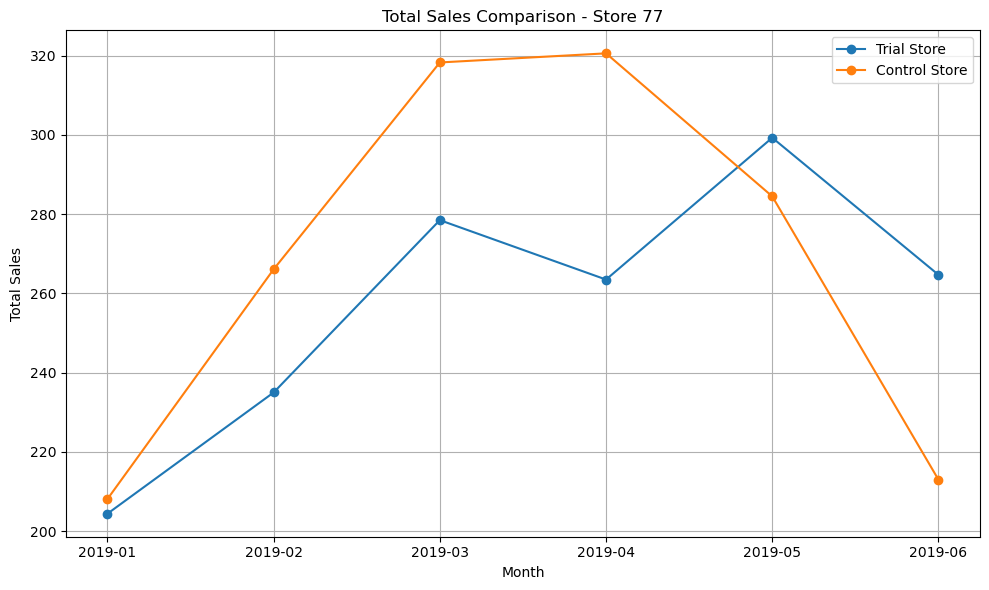

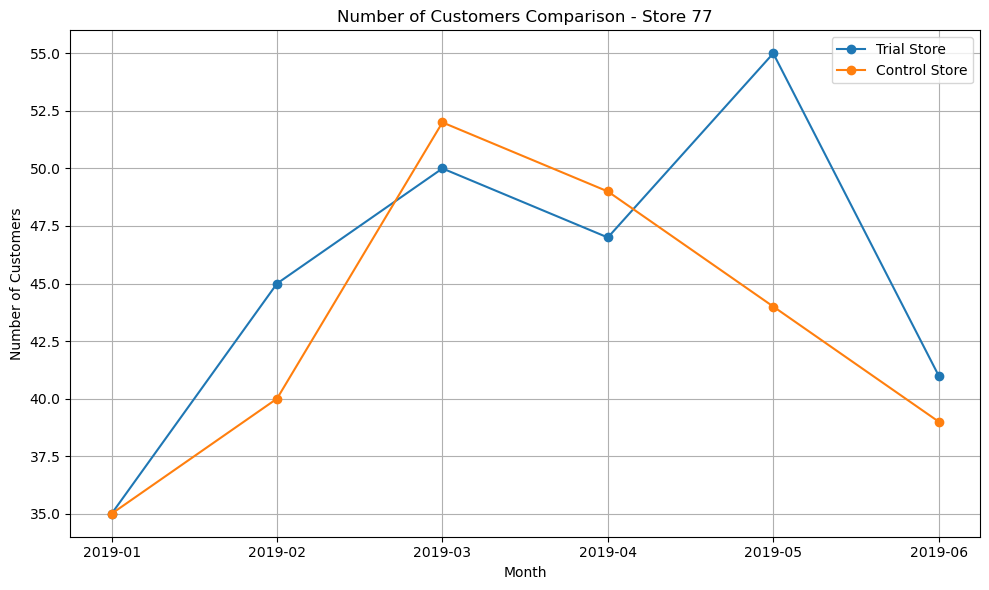

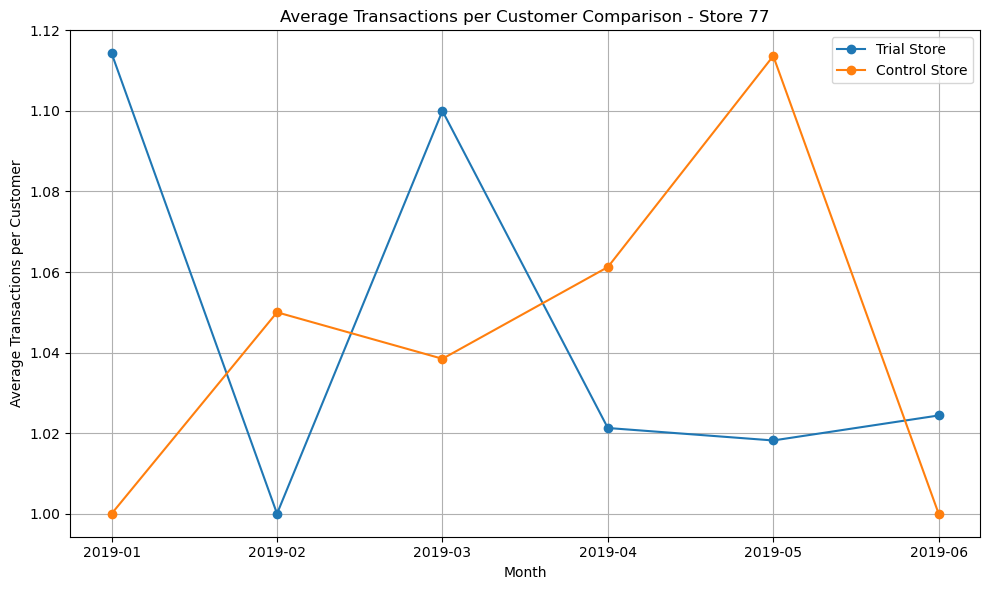

In [23]:
import matplotlib.pyplot as plt

# Create a function to plot the comparisons
def plot_comparison(data, metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    
    for store_type in ['trial', 'control']:
        plt.plot(data['MONTH'], data[f'{metric}_{store_type}'], label=f'{store_type.capitalize()} Store', marker='o')
    
    plt.title(title)
    plt.xlabel('Month')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Save the figure
    plt.savefig(f'{title}.png')
    plt.show()

# Convert the MONTH column to string format suitable for plotting
comparisons[77]['MONTH'] = comparisons[77]['MONTH'].astype(str)

# Plot total sales comparison for Trial Store 77
plot_comparison(comparisons[77], 'total_sales', 'Total Sales Comparison - Store 77', 'Total Sales')

# Plot number of customers comparison for Trial Store 77
plot_comparison(comparisons[77], 'total_customers', 'Number of Customers Comparison - Store 77', 'Number of Customers')

# Plot average transactions per customer comparison for Trial Store 77
plot_comparison(comparisons[77], 'avg_transactions_per_customer', 'Average Transactions per Customer Comparison - Store 77', 'Average Transactions per Customer')

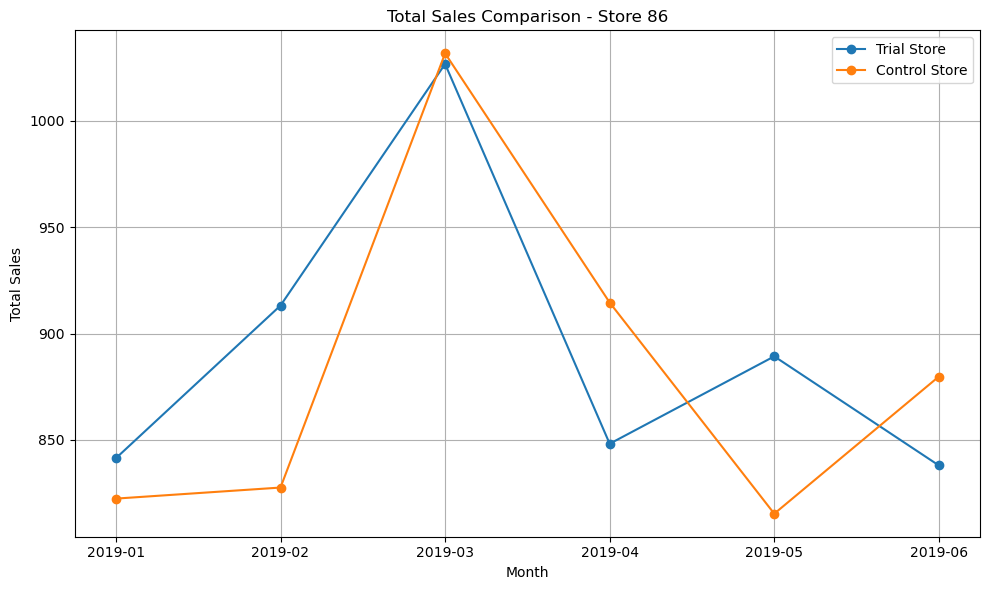

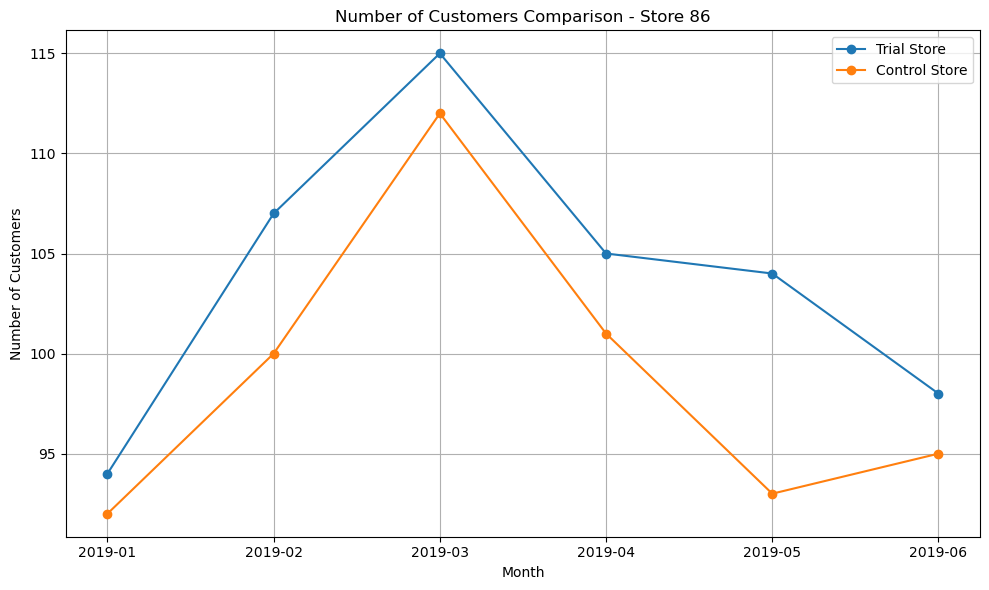

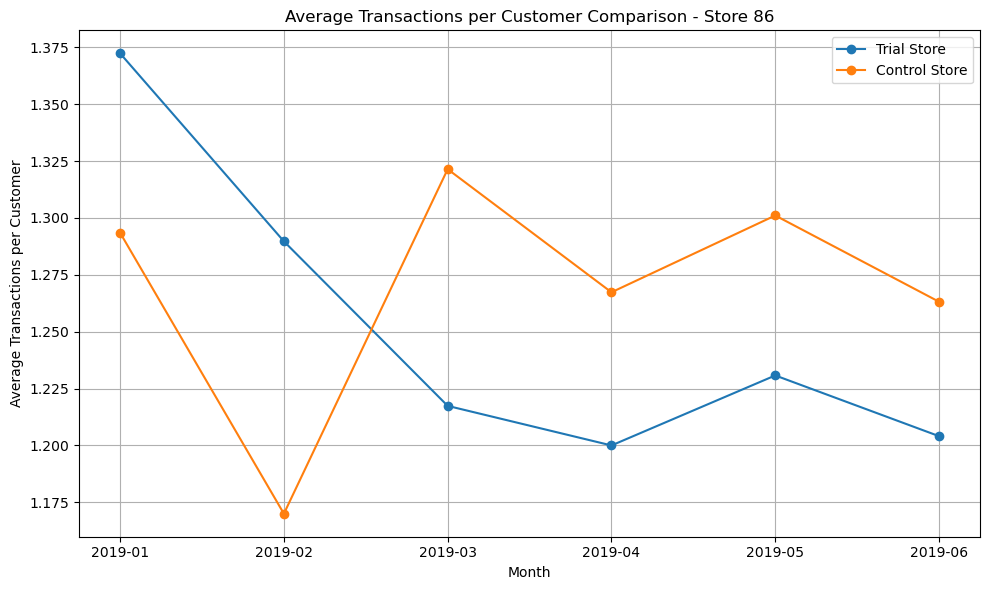

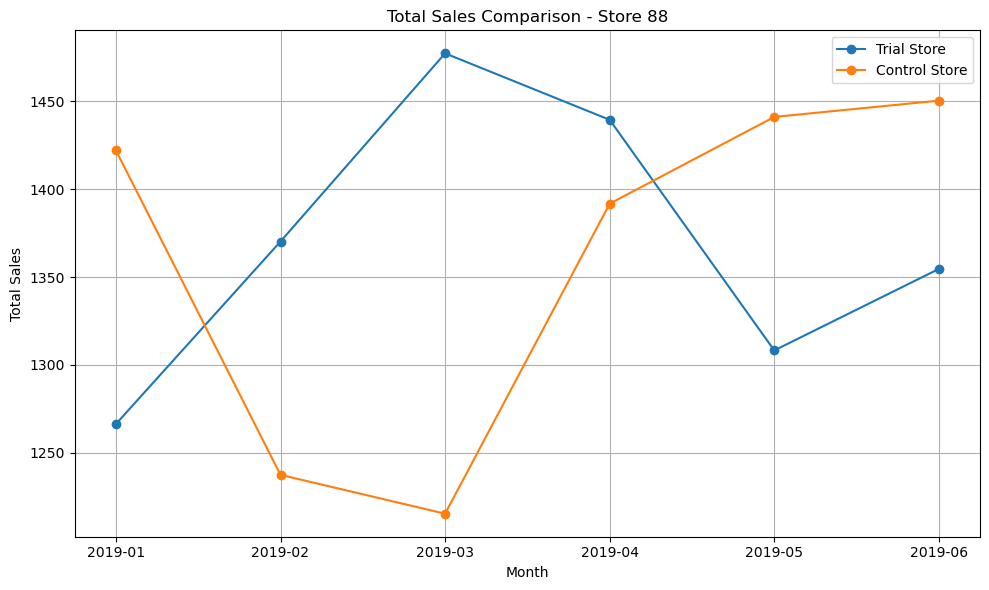

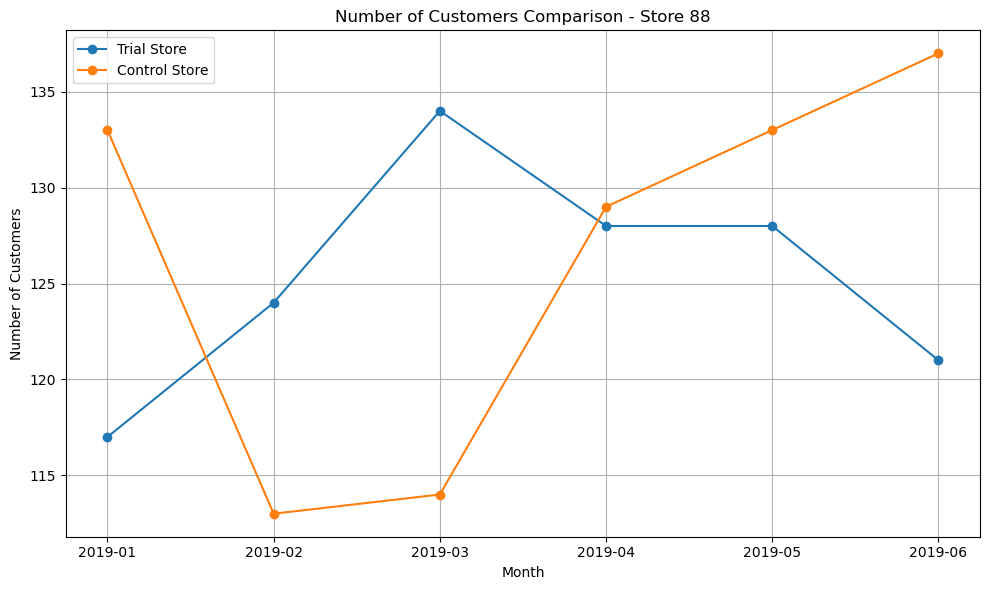

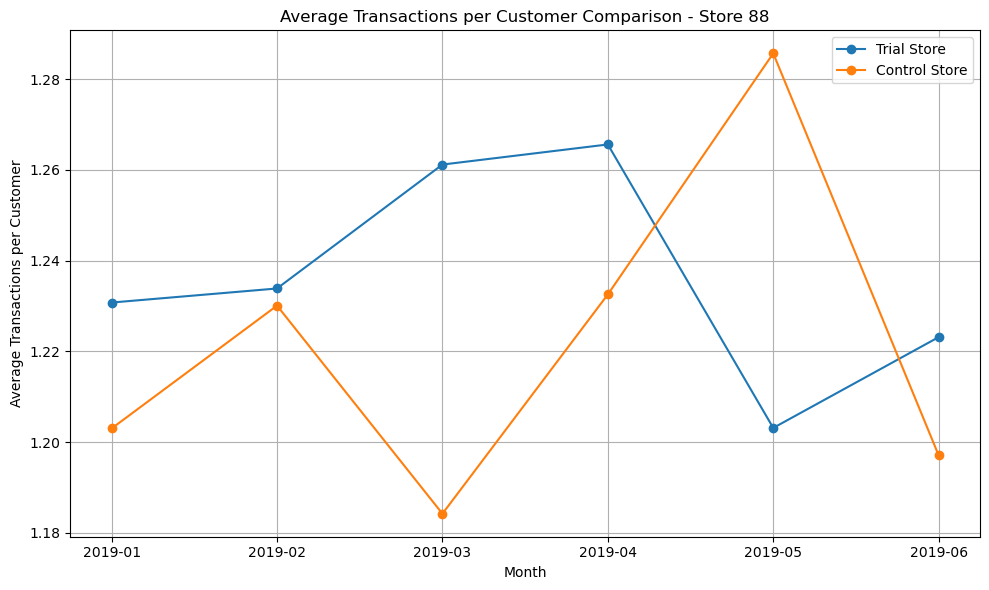

In [24]:
# Convert the MONTH column to string format for plotting
comparisons[86]['MONTH'] = comparisons[86]['MONTH'].astype(str)
comparisons[88]['MONTH'] = comparisons[88]['MONTH'].astype(str)

# Plot total sales comparison for Trial Store 86
plot_comparison(comparisons[86], 'total_sales', 'Total Sales Comparison - Store 86', 'Total Sales')

# Plot number of customers comparison for Trial Store 86
plot_comparison(comparisons[86], 'total_customers', 'Number of Customers Comparison - Store 86', 'Number of Customers')

# Plot average transactions per customer comparison for Trial Store 86
plot_comparison(comparisons[86], 'avg_transactions_per_customer', 'Average Transactions per Customer Comparison - Store 86', 'Average Transactions per Customer')

# Plot total sales comparison for Trial Store 88
plot_comparison(comparisons[88], 'total_sales', 'Total Sales Comparison - Store 88', 'Total Sales')

# Plot number of customers comparison for Trial Store 88
plot_comparison(comparisons[88], 'total_customers', 'Number of Customers Comparison - Store 88', 'Number of Customers')

# Plot average transactions per customer comparison for Trial Store 88
plot_comparison(comparisons[88], 'avg_transactions_per_customer', 'Average Transactions per Customer Comparison - Store 88', 'Average Transactions per Customer')

In [28]:
from pptx import Presentation
from pptx.util import Inches

# Create a presentation object
prs = Presentation()

# Slide Layouts
title_slide_layout = prs.slide_layouts[0]
content_slide_layout = prs.slide_layouts[1]

# Title Slide
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Quantium Project Report"
subtitle.text = "Evaluation of Store Trial Performance"

# Add a slide for each trial store
trial_stores_info = {
    77: "Total Sales, Number of Customers, and Average Transactions per Customer Comparison for Store 77",
    86: "Total Sales, Number of Customers, and Average Transactions per Customer Comparison for Store 86",
    88: "Total Sales, Number of Customers, and Average Transactions per Customer Comparison for Store 88"
}

for trial_store, description in trial_stores_info.items():
    slide = prs.slides.add_slide(content_slide_layout)
    title = slide.shapes.title
    content = slide.placeholders[1]
    
    title.text = f"Store {trial_store} Analysis"
    content.text = description
    
    # Add images to the slide
    for metric in ['Total Sales', 'Number of Customers', 'Average Transactions per Customer']:
        img_path = f'{metric} Comparison - Store {trial_store}.png'
        slide.shapes.add_picture(img_path, Inches(1), Inches(2), height=Inches(3.5))

# Recommendations Slide
slide = prs.slides.add_slide(content_slide_layout)
title = slide.shapes.title
content = slide.placeholders[1]
title.text = "Recommendations"
content.text = (
    "1. **Reevaluate Trial Strategy**: Consider revising the trial strategy, such as extending the trial period, modifying promotional tactics, "
    "or selecting different trial stores to achieve a more noticeable impact.\n\n"
    "2. **Further Analysis**: Conduct a more detailed analysis to identify any potential trends or patterns that might not be captured by the overall sales metrics. "
    "This could include customer feedback, product-specific performance, or regional differences.\n\n"
    "3. **Targeted Promotions**: Implement targeted promotions for high-frequency purchasers to increase loyalty and spending.\n\n"
    "4. **Stock Optimization**: Focus on stocking the most popular pack sizes (175g, 150g) to ensure availability and meet customer demand.\n\n"
    "5. **Brand Partnership Opportunities**: Leverage the popularity of top brands to negotiate better deals or co-promotional opportunities.\n\n"
    "6. **Customer Segmentation**: Use the purchase behaviour data to segment customers based on their lifecycle stage and premium status. "
    "Tailor marketing campaigns to each segment.\n\n"
    "7. **Cross-Selling and Upselling**: Introduce complementary products in the same category or related categories (e.g., dips, sodas) to increase basket size. "
    "Highlight these products during checkout or through personalized recommendations."
)

# Save the presentation
prs.save('Quantium_Project_Report.pptx')